In [239]:
import pandas as pd
import numpy as np

In [240]:
df = pd.read_csv('master.csv')

In [241]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


### Preprocessing

In [242]:
cols_to_drop = ['country-year','suicides_no',' gdp_for_year ($) ']
df = df.drop(cols_to_drop,axis=1)

In [243]:
df.head()

,country,year,sex,age,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,6.71,NaN,796,Generation X
1,Albania,1987,male,35-54 years,308000,5.19,NaN,796,Silent
2,Albania,1987,female,15-24 years,289700,4.83,NaN,796,Generation X
3,Albania,1987,male,75+ years,21800,4.59,NaN,796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.28,NaN,796,Boomers


In [244]:
x=df['gdp_per_capita ($)'].describe()
y=df['HDI for year'].describe()
df['gdp_per_capita ($)'].fillna(x['mean'],inplace=True)
df['HDI for year'].fillna(y['mean'],inplace=True)
df['suicides/100k pop'].fillna(df['suicides/100k pop'].mean(),inplace=True)

In [245]:
def remove_years_from_age(age):
    split_age = age.split(' ')
    return split_age[0]
df['age'] = df['age'].apply(remove_years_from_age)

<Axes: >

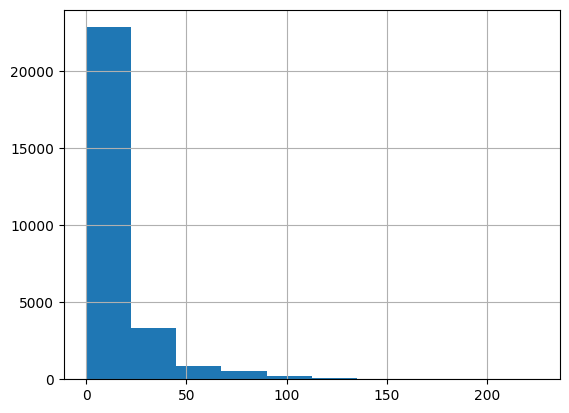

In [246]:
df['suicides/100k pop'].hist()


In [247]:
#dividing the suicides/100k pop into 3 categories
a=df['suicides/100k pop'].describe()
def func(x):
    if x<=a['25%']:
        return 'low_suicides'
    elif x>a['25%'] and x<=a['75%']:
        return 'medium_suicides'
    else:
        return 'high_suicides'
df['suicides/100k pop']=df['suicides/100k pop'].apply(func)

In [248]:
gdp = df['gdp_per_capita ($)'].describe()
def func_gdp(x):
    if x<=gdp['25%']:
        return 'low_gdp'
    elif x>gdp['25%'] and x<=gdp['75%']:
        return 'medium_gdp'
    else:
        return 'high_gdp'
df['gdp_per_capita ($)'] = df['gdp_per_capita ($)'].apply(func_gdp)

In [249]:
population = df['population'].describe()
def func_pop(x):
    if x<=population['25%']:
        return 'low_population'
    elif x>population['25%'] and x<=population['75%']:
        return 'medium_population'
    else:
        return 'high_population'
df['population'] = df['population'].apply(func_pop)

In [250]:
hdi = df['HDI for year'].describe()
def func_hdi(x):
    if x<=hdi['25%']:
        return 'low_hdi'
    elif x>hdi['25%'] and x<=hdi['75%']:
        return 'medium_hdi'
    else:
        return 'high_hdi'
df['HDI for year'] = df['HDI for year'].apply(func_hdi)

In [251]:
ans = set()
dim = df.columns.tolist()

In [252]:
lst = [(i,len(df[i].unique())) for i in dim]
lst.sort(key=lambda x:x[1])
dim=[i[0] for i in lst]

In [253]:
def fun(cols,target):
    for i in range(len(cols)):
        if cols[i]==target:
            return i
    return -1

def buc(df,dim,row):
    #base case
    if len(dim)==0:
        #print("len 0")
        if len(df)>=2:
            row[len(row)-1]=len(df)
            #print(row)
            ans.add(tuple(row))
            row[len(row)-1]=0
        return

    first_attr=dim[0]
    remaining=dim[1:]
    # loop through the unique rows
    for attr in df[first_attr].unique():
        partial_df = df[df[first_attr]==attr]
        # print(partial_df)
        if len(partial_df)>=20:
            row[fun(df.columns,first_attr)] = attr
            row[len(row)-1]=len(partial_df)
            copy_row=list(row)
            #print(row)
            ans.add(tuple(row))
            buc(partial_df,remaining,copy_row)
            row[fun(df.columns,first_attr)] = '*'
            row[len(row)-1]=0

In [254]:
print(df.columns.tolist()+['count'])
row = ['*']*len(dim)
row.append(0)
buc(df,dim,row)
for x in ans:
    print(x)

['country', 'year', 'sex', 'age', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'generation', 'count']
('*', '*', 'male', '15-24', 'high_population', 'medium_suicides', 'low_hdi', 'high_gdp', 'Generation X', 26)
('*', '*', 'female', '*', 'medium_population', 'medium_suicides', 'high_hdi', 'high_gdp', '*', 459)
('*', '*', 'male', '*', 'high_population', 'medium_suicides', 'high_hdi', '*', '*', 175)
('*', '*', 'male', '*', 'medium_population', '*', 'low_hdi', '*', '*', 5770)
('*', '*', 'female', '55-74', 'high_population', 'medium_suicides', 'low_hdi', 'high_gdp', '*', 97)
('*', '*', 'female', '75+', 'medium_population', 'low_suicides', 'low_hdi', 'low_gdp', 'G.I. Generation', 23)
('*', '*', 'male', '5-14', 'low_population', 'low_suicides', 'high_hdi', 'high_gdp', '*', 34)
('*', '*', 'female', '*', 'high_population', 'medium_suicides', 'low_hdi', 'high_gdp', '*', 497)
('*', '*', 'male', '35-54', 'medium_population', 'high_suicides', 'high_hdi', 'high_gdp', '*',

In [255]:
new_df = pd.DataFrame(ans,columns=df.columns.tolist()+['count'])

In [256]:
new_df.head(10)

,country,year,sex,age,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation,count
0,*,*,male,15-24,high_population,medium_suicides,low_hdi,high_gdp,Generation X,26
1,*,*,female,*,medium_population,medium_suicides,high_hdi,high_gdp,*,459
2,*,*,male,*,high_population,medium_suicides,high_hdi,*,*,175
3,*,*,male,*,medium_population,*,low_hdi,*,*,5770
4,*,*,female,55-74,high_population,medium_suicides,low_hdi,high_gdp,*,97
5,*,*,female,75+,medium_population,low_suicides,low_hdi,low_gdp,G.I. Generation,23
6,*,*,male,5-14,low_population,low_suicides,high_hdi,high_gdp,*,34
7,*,*,female,*,high_population,medium_suicides,low_hdi,high_gdp,*,497
8,*,*,male,35-54,medium_population,high_suicides,high_hdi,high_gdp,*,66
9,*,*,male,*,high_population,high_suicides,high_hdi,*,*,322


In [257]:
df.to_csv('master_updated.csv',index=False)

### Dividing the original csv file into multiple pages

In [258]:
#dividing the original csv file into multiple pages (assuming that it doesn't fit in memory)
df1 = pd.read_csv('master_updated.csv',chunksize=2000)
for i,chunk in enumerate(df1):
    chunk.to_csv('./pages/master_'+str(i)+'.csv',index=False)

In [265]:
import os
lst_tuples = []
for col in df.columns:
    unique=0
    hashMap_attributes = {}
    for file in os.listdir('./pages'):
        df_temp=pd.read_csv('./pages/'+file)
        for i in df[col]:
            if i not in hashMap_attributes:
                hashMap_attributes[i]=unique
                unique+=1
    lst_tuples.append((col,unique))
    
lst_tuples.sort(key=lambda x:x[1])
dim_lst=[i[0] for i in lst_tuples]

In [267]:
lst_tuples

[('sex', 2),
 ('HDI for year', 2),
 ('population', 3),
 ('suicides/100k pop', 3),
 ('gdp_per_capita ($)', 3),
 ('age', 6),
 ('generation', 6),
 ('year', 32),
 ('country', 101)]

In [268]:
hashMap = {}

In [271]:
def buc_pages(pages,dim,row):
    #base case
    if len(dim)==0:
        #print("len 0")
        if len(pages)>=2:
            row[len(row)-1]=len(pages)
            #print(row)
            # ans.add(tuple(row))
            temp = list(row)
            temp.pop()
            if tuple(temp) not in hashMap:
                hashMap[tuple(temp)] = len(pages)
            else:
                hashMap[tuple(temp)] += len(pages)
            row[len(row)-1]=0
        return

    first_attr=dim[0]
    remaining=dim[1:]
    # loop through the unique rows
    for attr in pages[first_attr].unique():
        partial_df = pages[pages[first_attr]==attr]
        # print(partial_df)
        if len(partial_df)>=20:
            row[fun(pages.columns,first_attr)] = attr
            row[len(row)-1]=len(partial_df)
            copy_row=list(row)
            copy_row1 = list(row)
            copy_row1.pop()
            #print(row)
            # ans.add(tuple(row))
            if tuple(copy_row1) not in hashMap:
                hashMap[tuple(copy_row1)] = len(partial_df)
            else:
                hashMap[tuple(copy_row1)] += len(partial_df)
            buc_pages(partial_df,remaining,copy_row)
            row[fun(pages.columns,first_attr)] = '*'
            row[len(row)-1]=0

In [272]:
for file in os.listdir('./pages'):
    chunk=pd.read_csv('./pages/'+file)
    row = ['*']*len(dim_lst)
    row.append(0)
    buc_pages(chunk,dim_lst,row)

In [276]:
print(df.columns.tolist()+['count'])
for i in hashMap:
    print(i,hashMap[i])

['country', 'year', 'sex', 'age', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'generation', 'count']
('*', '*', 'male', '*', '*', '*', '*', '*', '*') 13910
('*', '*', 'male', '*', '*', '*', 'low_hdi', '*', '*') 11768
('*', '*', 'male', '*', 'medium_population', '*', 'low_hdi', '*', '*') 5770
('*', '*', 'male', '*', 'medium_population', 'medium_suicides', 'low_hdi', '*', '*') 2328
('*', '*', 'male', '*', 'medium_population', 'medium_suicides', 'low_hdi', 'low_gdp', '*') 955
('*', '*', 'male', '15-24', 'medium_population', 'medium_suicides', 'low_hdi', 'low_gdp', '*') 174
('*', '*', 'male', '15-24', 'medium_population', 'medium_suicides', 'low_hdi', 'low_gdp', 'Generation X') 81
('*', '*', 'male', '35-54', 'medium_population', 'medium_suicides', 'low_hdi', 'low_gdp', '*') 134
('*', '*', 'male', '35-54', 'medium_population', 'medium_suicides', 'low_hdi', 'low_gdp', 'Boomers') 29
('*', '*', 'male', '25-34', 'medium_population', 'medium_suicides', 'low_hdi', 'lo

Time taken to preprocess the data:  9.444031238555908
Time taken to preprocess the data:  5.146966218948364
Time taken to preprocess the data:  3.257000684738159
Time taken to preprocess the data:  2.899033784866333
Time taken to preprocess the data:  2.651966094970703
Time taken to preprocess the data:  2.3800010681152344
Time taken to preprocess the data:  2.244004964828491


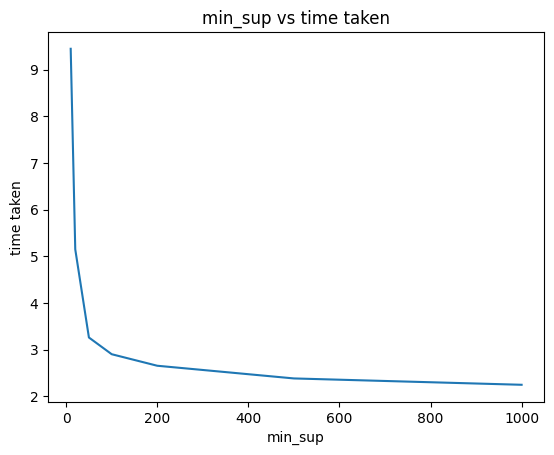

In [293]:
import time
import os
import matplotlib.pyplot as plt
def buc_complete(minsup=20,block_size=2000):
    #calculate execution time
    start = time.time()
    df1 = pd.read_csv('master_updated.csv',chunksize=block_size)
    for i,chunk in enumerate(df1):
        chunk.to_csv('./pages/master_'+str(i)+'.csv',index=False)
    
    lst_tuples = []
    for col in df.columns:
        unique=0
        hashMap_attributes = {}
        for file in os.listdir('./pages'):
            df_temp=pd.read_csv('./pages/'+file)
            for i in df[col]:
                if i not in hashMap_attributes:
                    hashMap_attributes[i]=unique
                    unique+=1
        lst_tuples.append((col,unique))
        
    lst_tuples.sort(key=lambda x:x[1])
    dim_lst=[i[0] for i in lst_tuples]
    hashMap = {}
    def buc_pages(pages,dim,row):
    #base case
        if len(dim)==0:
            #print("len 0")
            if len(pages)>=minsup:
                row[len(row)-1]=len(pages)
                #print(row)
                # ans.add(tuple(row))
                temp = list(row)
                temp.pop()
                if tuple(temp) not in hashMap:
                    hashMap[tuple(temp)] = len(pages)
                else:
                    hashMap[tuple(temp)] += len(pages)
                row[len(row)-1]=0
            return

        first_attr=dim[0]
        remaining=dim[1:]
        # loop through the unique rows
        for attr in pages[first_attr].unique():
            partial_df = pages[pages[first_attr]==attr]
            # print(partial_df)
            if len(partial_df)>=minsup:
                row[fun(pages.columns,first_attr)] = attr
                row[len(row)-1]=len(partial_df)
                copy_row=list(row)
                copy_row1 = list(row)
                copy_row1.pop()
                #print(row)
                # ans.add(tuple(row))
                if tuple(copy_row1) not in hashMap:
                    hashMap[tuple(copy_row1)] = len(partial_df)
                else:
                    hashMap[tuple(copy_row1)] += len(partial_df)
                buc_pages(partial_df,remaining,copy_row)
                row[fun(pages.columns,first_attr)] = '*'
                row[len(row)-1]=0
    for file in os.listdir('./pages'):
        chunk=pd.read_csv('./pages/'+file)
        row = ['*']*len(dim_lst)
        row.append(0)
        buc_pages(chunk,dim_lst,row)
    end=time.time()
    print("Time taken to preprocess the data: ",end-start)
    return end-start
    
min_sup=[10,20,50,100,200,500,1000]
time_lst=[]
for i in min_sup:
    time_lst.append(buc_complete(i))
plt.plot(min_sup,time_lst)
plt.xlabel('min_sup')
plt.ylabel('time taken')
plt.title('min_sup vs time taken')
plt.show()

Time taken to preprocess the data:  32.17500162124634
Time taken to preprocess the data:  25.578523635864258
Time taken to preprocess the data:  25.90030336380005
Time taken to preprocess the data:  26.766523599624634
Time taken to preprocess the data:  31.855995655059814
Time taken to preprocess the data:  28.695003986358643
Time taken to preprocess the data:  31.760002851486206
Time taken to preprocess the data:  31.441170692443848


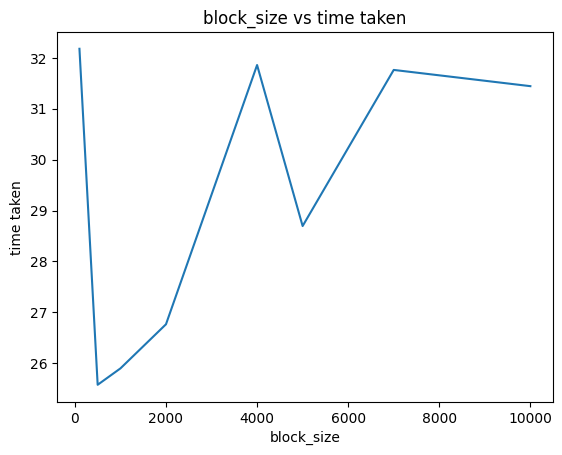

In [294]:
block_size=[100,500,1000,2000,4000,5000,7000,10000]
time_lst=[]
for i in block_size:
    time_lst.append(buc_complete(20,i))

plt.plot(block_size,time_lst)
plt.xlabel('block_size')
plt.ylabel('time taken')
plt.title('block_size vs time taken')
plt.show()

### Part B: Attribute oriented selection

In [295]:
df = pd.read_csv('data.csv')
df.head()

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_10800\3021068287.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
